# Codecademy [NBA Trends Project](https://www.codecademy.com/projects/practice/nba-trends)

*Analyze National Basketball Association (NBA) data to look at associations between teams, win-rates, playoff appearances, and more.*

In this project, you'll analyze data from the NBA (National Basketball Association) and explore possible associations. 

This data was originally sourced from 538's Analysis of the [Complete History Of The NBA](http://fivethirtyeight.com/interactives/the-complete-history-of-every-nba-team-by-elo) and contains the original, unmodified data from [Basketball Reference](http://www.basketball-reference.com/) as well as several additional variables 538 added to perform their own analysis. 

You can read more about the data and how it's being used by 538 [here](https://github.com/fivethirtyeight/data/tree/master/nba-elo). For this project we've limited the data to just 5 teams and 10 columns (plus one constructed column, `point_diff`, the difference between `pts` and `opp_pts`).

You will create several charts and tables in this project, so you'll need to use `plt.clf()` between plots in your code so that the plots don't layer on top of one another.


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#used to make the output look nicer
np.set_printoptions(suppress=True, precision = 2)

In [4]:
nba = pd.read_csv('nba_games.csv')
nba.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
0,194611010TRH,1947,Knicks,Huskies,A,0,68,66,W,0.359935,2
1,194611020CHS,1947,Knicks,Stags,A,0,47,63,L,0.368899,-16
2,194611020PRO,1947,Celtics,Steamrollers,A,0,53,59,L,0.359935,-6
3,194611050BOS,1947,Celtics,Stags,H,0,55,57,L,0.620204,-2
4,194611070STB,1947,Knicks,Bombers,A,0,68,63,W,0.339290,5


In [5]:
# Subset Data to 2010 Season, 2014 Season
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

### Task 1
The data has been subset for you into two smaller datasets: games from 2010 (named nba_2010) and games from 2014 (named nba_2014). To start, let’s focus on the 2010 data.

Suppose you want to compare the knicks to the nets with respect to points earned per game. Using the pts column from the nba_2010 DataFrame, create two series named knicks_pts (fran_id = "Knicks") and nets_pts(fran_id = "Nets") that represent the points each team has scored in their games.


In [50]:
#Calculating the sum of the points for the teams
knicks = nba_2010[nba_2010.fran_id == "Knicks"]
nets = nba_2010[nba_2010.fran_id == "Nets"]
knicks_pts = knicks.pts
nets_pts = nets.pts

### Task 2

Calculate the difference between the two teams’ average points scored and save the result as diff_means_2010. Based on this value, do you think fran_id and pts are associated? Why or why not?


In [38]:
#Calculating the average and displaying them
knicks_avg = sum(knicks_pts)/(len(nba_2010[nba_2010.fran_id =="Knicks"])) 
nets_avg = sum(nets_pts)/(len(nba_2010[nba_2010.fran_id == "Nets"]))
diff_means_2010 = knicks_avg - nets_avg
print("Average points scored by the Knicks: {}".format(knicks_avg))
print("Average points scored by the Nets: {}".format(nets_avg))
print("Difference in points: {}".format(diff_means_2010))

Average points scored by the Knicks: 102.10975609756098
Average points scored by the Nets: 92.3780487804878
Difference in points: 9.731707317073173


In [39]:
### To determine if a quantitative variable and a qualitative variables are associated or not, we will need to find the mean,
### median and their difference to assertain to a certain extent if they're associated or not. We've calculated the mean and
### the difference, we will not do the same for the median. 

knicks_median = nba_2010.loc[nba_2010.fran_id == "Knicks", "pts"].median()
nets_median = nba_2010.loc[nba_2010.fran_id == "Nets", "pts"].median()
diff_median_2010 = knicks_median - nets_median 
print("Median point scored by the Knicks: {}".format(knicks_median))
print("Median point scored by the Nets: {}".format(nets_median))
print("Difference in points: {}".format(diff_median_2010))

Median point scored by the Knicks: 100.5
Median point scored by the Nets: 92.0
Difference in points: 8.5


In [24]:
### We can clearly see that both the differences of mean and median give us a positive value. Highly associated variables
### tend to have larger mean and median differences, hence we can say that there is association but the degree of the 
### association will have to either be represented by box plots or histograms. 

### Task 3
Rather than comparing means, it’s useful look at the full distribution of values to understand whether a difference in means is meaningful. Create a set of overlapping histograms that can be used to compare the points scored for the Knicks compared to the Nets. Use the series you created in the previous step (1) and the code below to create the plot. Do the distributions appear to be the same?


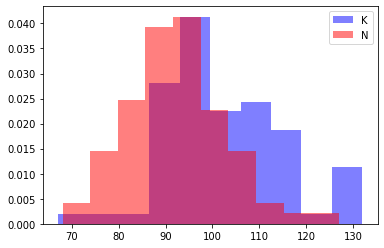

In [48]:
#Plotting the histogram
plt.hist(knicks_pts, color = 'blue', label='K',density=True, alpha=0.5)
plt.hist(nets_pts, color = 'red', label='N', density=True, alpha=0.5)
plt.legend()
plt.show()

In [51]:
### No, the distributions do not appear to be the same. We can see that the points accumulated by the Knicks apprear 
### to be shifted to the right as compared to that of the Nets.

### Task 4
Now, let’s compare the 2010 games to 2014. Replicate the steps from Tasks 2 and 3 using `nba_2014`. First, calculate the mean difference between the two teams points scored. Save and print the value as `diff_means_2014`. Did the difference in points get larger or smaller in 2014? Then, plot the overlapping histograms. Does the mean difference you calculated make sense?


In [55]:
#Calculating the mean, median and their differences for the year: 2014
knicks_mean14 = nba_2014.loc[nba_2014.fran_id == "Knicks", "pts"].mean()
nets_mean14 = nba_2014.loc[nba_2014.fran_id == "Nets", "pts"].mean()
diff_means_2014 = knicks_mean14 - nets_mean14
knicks_meadian14 = knicks_median = nba_2014.loc[nba_2014.fran_id == "Knicks", "pts"].median()
nets_median14 = nba_2014.loc[nba_2014.fran_id == "Nets", "pts"].median()
diff_median_2014 = knicks_meadian14 - nets_median14
print(diff_means_2014)
print(diff_median_2014)

0.44706798131809933
0.0


In [ ]:
# From the values above, we can say that the associatation between the franch and the points is weak as the difference is
# very small.

In [56]:
#Calculating the points earned per game for the year: 2014 
knicks14 = nba_2014[nba_2014.fran_id == "Knicks"]
nets14 = nba_2014[nba_2014.fran_id == "Nets"]
knicks_pts14 = knicks14.pts
nets_pts14 = nets14.pts

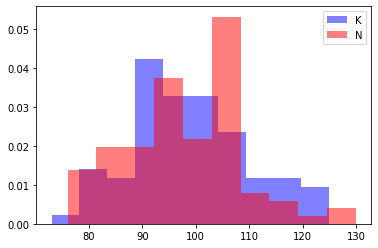

In [57]:
#Plotting the histogram for the year: 2014
plt.hist(knicks_pts14, color = 'blue', label='K',density=True, alpha=0.5)
plt.hist(nets_pts14, color = 'red', label='N', density=True, alpha=0.5)
plt.legend()
plt.show()

### Task 5
For the remainder of this project, we’ll focus on data from 2010. Let’s now include all teams in the dataset and investigate the relationship between franchise and points scored per game.

Using nba_2010, generate side-by-side boxplots with points scored (pts) on the y-axis and team (fran_id) on the x-axis. Is there any overlap between the boxes? Does this chart suggest that fran_id and pts are associated? Which pairs of teams, if any, earn different average scores per game?


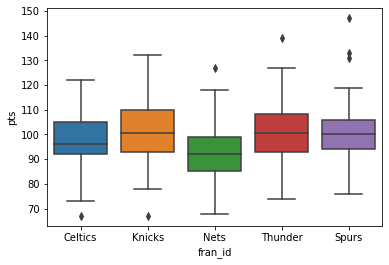

In [59]:
#Generating a box plot
sns.boxplot(data=nba_2010, x='fran_id', y='pts')
plt.show()

In [65]:
#Looking at the box plots, we can say that almost all the teams' individual box plots pretty much overlap each other. 
#Therefore, we can say that there is not much association between the fran_id and pts. 
#If we look at the Spurs and the Nets, we can see that these teams have the least amount of overlap. If any of the pairs 
#were to generate different average scores, it would be these two franchises. 

### Task 6
We'd like to know if teams tend to win more games at home compared to away.

The variable, `game_result`, indicates whether a team won a particular game ('W' stands for “win” and 'L' stands for “loss”). The variable, `game_location`, indicates whether a team was playing at home or away ('H' stands for “home” and 'A' stands for “away”). 

Data scientists will often calculate a contingency table of frequencies to help them determine if categorical variables are associated. Calculate a table of frequencies that shows the counts of game_result and game_location.

Save your result as `location_result_freq` and print your result. Based on this table, do you think the variables are associated?`


In [67]:
#Calculating a contingency frequency of location and the result
location_result_freq = pd.crosstab(nba_2010.game_result, nba_2010.game_location)
print(location_result_freq)

game_location    A    H
game_result            
L              133  105
W               92  120


In [68]:
# From the above data, we can say that the two variables are associated. The losses are greater when the teams play 
# away from home whereas the teams tend to win more games when they play at their home stadium but not by a greater number.

### Task 7

Convert this table of frequencies to a table of proportions and save the result as `location_result_proportions`.

In [69]:
location_result_proportions = location_result_freq/len(nba_2010)
print(location_result_proportions)

game_location         A         H
game_result                      
L              0.295556  0.233333
W              0.204444  0.266667


In [ ]:
# We can see that the win rate at the home stadium is 6% more than the win rate when played at a stadium away from home.

### Task 8
Using the contingency table created above (Task 6), calculate the expected contingency table (if there were no association) and the Chi-Square statistic.

Does the actual contingency table look similar to the expected table — or different? Based on this output, do you think there is an association between these variables?


In [73]:
chi2, pval, dof, expected = chi2_contingency(location_result_freq )
print(expected)
print(chi2)

[[119. 119.]
 [106. 106.]]
6.501704455367053


In [ ]:
### The expected and actual contingency tabels look similar. As we can see that there is not much difference between 
### the expected value and the observed value. Hence we can conclude
### that the association exists but is weak between these variables for the year 2010. 

*For a 2x2 table, Chi-squared greater than about 4 indicates an association. We're not there*

### Task 9

For each game, 538 has calculated the probability that each team will win the game. We want to know if teams with a higher probability of winning (according to 538) also tend to win games by more points. 

In the data, 538's prediction is saved as `forecast`. The `point_diff` column gives the margin of victory/defeat for each team (positive values mean that the team won; negative values mean that they lost). 

Using `nba_2010`, calculate the covariance between `forecast` (538's projected win probability) and `point_diff` (the margin of victory/defeat) in the dataset. Save and print your result. Looking at the matrix, what is the covariance between these two variables?


In [75]:
#Printing the covariance matrix
cov_fc_pd = np.cov(nba_2010.forecast, nba_2010.point_diff)
print(cov_fc_pd)

[[  0.05   1.37]
 [  1.37 186.56]]


In [ ]:
### The covariance of the two quantitaive variables is 1.37 which indicates a stronger association. 538s predictions were 
### largely associated with the win rate. 

### Task 10

Because 538’s forecast variable is reported as a probability (not a binary), we can calculate the strength of the correlation.

Using nba_2010, calculate the correlation between `forecast` and `point_diff`. Call this `point_diff_forecast_corr`. Save and print your result. Does this value suggest an association between the two variables?


In [77]:
point_diff_forecast_corr, p= pearsonr(nba_2010.forecast, nba_2010.point_diff)
print(point_diff_forecast_corr)

0.44020887084680815


In [ ]:
### The value of 0.44 suggests that there exists a linear association between the forecast and the difference in points.

### Task 11

Generate a scatter plot of `forecast` (on the x-axis) and `point_diff` (on the y-axis). Does the correlation value make sense?

<function matplotlib.pyplot.show(*args, **kw)>

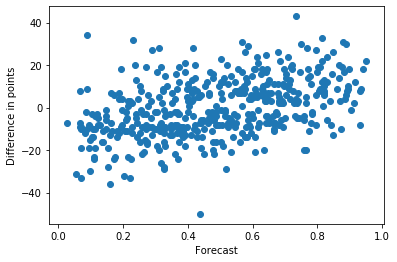

In [78]:
plt.scatter(x = nba_2010.forecast, y = nba_2010.point_diff)
plt.xlabel("Forecast")
plt.ylabel("Difference in points")
plt.show

In [ ]:
## The grpah makes sense as a considerable amount of points that which are greater than 0.5 on the x-axis are above 0 on
## the y-axis. 